In [1]:
# this EDA has a lot of visualisation and feature Engineering
# also it is a great example of target variable i.e case_status

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('us_perm_visas.csv')

In [3]:
df.shape

(374362, 154)

In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [5]:
df.sample()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
93341,NaN,NaN,NaN,NaN,ONLINE,A-13113-58491,NaN,NaN,Certified-Expired,H-1B,...,NaN,NaN,NaN,Other Economic Sector,NaN,NaN,NaN,126000.0,147000.0,Year


In [6]:
print(df.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

In [7]:
df['case_no']

0         A-07323-97014
1         A-07332-99439
2         A-07333-99643
3         A-07339-01930
4         A-07345-03565
              ...      
374357              NaN
374358              NaN
374359              NaN
374360              NaN
374361              NaN
Name: case_no, Length: 374362, dtype: object

In [8]:
df['case_number']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
374357    A-16363-85407
374358    A-16271-56745
374359    A-16354-82345
374360    A-16357-84250
374361    A-16279-59292
Name: case_number, Length: 374362, dtype: object

In [9]:
# seeing the values of case_no and case_number both have same meanin,
# i.e. visa application number
# few values at the top in case_no. is null and few values at the end in case_number is null

In [10]:
df['case_no'].nunique()

134990

In [11]:
df["case_number"].nunique()

238418

In [12]:
df.shape

(374362, 154)

In [13]:
df['case_number'].isna().sum()

135269

In [14]:
# null values in case number is almost close to values in case_no

In [15]:
134990 + 238418

373408

In [16]:
df['case_number'] # top 135269 are null values(assumption)

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
374357    A-16363-85407
374358    A-16271-56745
374359    A-16354-82345
374360    A-16357-84250
374361    A-16279-59292
Name: case_number, Length: 374362, dtype: object

In [17]:
df.columns.get_loc('case_no') # to get the column index of case number

5

In [18]:
df.columns.get_loc('case_number') # to get the column index of case number

6

In [19]:
casenoindex = df.columns.get_loc('case_no') 
casenumberindex = df.columns.get_loc('case_number') 

casenumberlist = []
for value in df.iloc[0:135269, casenoindex]:
    casenumberlist.append(value)
for value in df.iloc[135269:374362, casenumberindex]:
    casenumberlist.append(value)

In [20]:
casenumberlist

['A-07323-97014',
 'A-07332-99439',
 'A-07333-99643',
 'A-07339-01930',
 'A-07345-03565',
 'A-07352-06288',
 'A-07354-06926',
 'A-08004-10147',
 'A-08004-10184',
 'A-08010-11785',
 'A-08057-27232',
 'A-08058-28001',
 'A-08076-33611',
 'A-08085-36053',
 'A-08104-41821',
 'A-08120-47187',
 'A-08127-49255',
 'A-08148-55775',
 'A-08162-60225',
 'A-08164-61023',
 'A-08176-64095',
 'A-08182-66284',
 'A-08190-68131',
 'A-08190-68200',
 'A-08271-91261',
 'A-08200-71216',
 'A-08203-71676',
 'A-08211-73870',
 'A-08211-74089',
 'A-08212-74295',
 'A-08220-76622',
 'A-08221-77017',
 'A-08221-77195',
 'A-08224-77312',
 'A-08225-77723',
 'A-08227-78536',
 'A-08238-81419',
 'A-08238-81533',
 'A-08240-82338',
 'A-08241-82750',
 'A-08246-83350',
 'A-08247-83629',
 'A-08254-85569',
 'A-08255-86138',
 'A-08259-87626',
 'A-08260-88111',
 'A-08264-89308',
 'A-08267-89752',
 'A-08267-89878',
 'A-08270-91040',
 'A-08276-92533',
 'A-08276-92560',
 'A-08280-93353',
 'A-08280-93404',
 'A-08280-93430',
 'A-08284-

In [21]:
df['casenumber'] = casenumberlist

In [22]:
df.drop(['case_no', 'case_number'], axis = 1, inplace = True)

In [23]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       ...
       'ri_us_workers_considered', 'schd_a_sheepherder', 'us_economic_sector',
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089', 'casenumber'],
      dtype='object', length=153)

In [24]:
df.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [25]:
# you can also use value_counts() directly
for value in df.case_status.unique():
    print(len(df[df['case_status'] == value]), "occurence of stats '{}'".format(value))

181933 occurence of stats 'Certified'
25649 occurence of stats 'Denied'
148586 occurence of stats 'Certified-Expired'
18194 occurence of stats 'Withdrawn'


In [26]:
df = df[df.case_status != 'Withdrawn']

In [27]:
df.case_status.value_counts()

case_status
Certified            181933
Certified-Expired    148586
Denied                25649
Name: count, dtype: int64

In [28]:
df.loc[df.case_status == "Certified-Expired", "case_status"] = "Certified"

In [29]:
df.case_status.value_counts()

case_status
Certified    330519
Denied        25649
Name: count, dtype: int64

In [30]:
df.case_status.value_counts(normalize = True)*100

case_status
Certified    92.798623
Denied        7.201377
Name: proportion, dtype: float64

In [31]:
# insights 7.2% of the visa applications were denied 

In [32]:
df.isnull().sum()

add_these_pw_job_title_9089      317031
agent_city                       153452
agent_firm_name                  157646
agent_state                      156544
application_type                 229320
                                  ...  
wage_offer_unit_of_pay_9089      108769
wage_offered_from_9089           248582
wage_offered_to_9089             326852
wage_offered_unit_of_pay_9089    289470
casenumber                            0
Length: 153, dtype: int64

In [33]:
# dropping rows and columns which are entire empty
df.dropna(axis = 1, how = 'all', inplace = True)
df.dropna(axis = 0, how = 'all', inplace = True)

In [34]:
for columns in df.columns:
    print(f"the missing values for {columns} is {df[columns].isnull().sum()}")
# can perform missing value treatment on these 

the missing values for add_these_pw_job_title_9089 is 317031
the missing values for agent_city is 153452
the missing values for agent_firm_name is 157646
the missing values for agent_state is 156544
the missing values for application_type is 229320
the missing values for case_received_date is 126848
the missing values for case_status is 0
the missing values for class_of_admission is 21085
the missing values for country_of_citizenship is 19272
the missing values for country_of_citzenship is 336951
the missing values for decision_date is 0
the missing values for employer_address_1 is 37
the missing values for employer_address_2 is 236133
the missing values for employer_city is 10
the missing values for employer_country is 126920
the missing values for employer_decl_info_title is 126886
the missing values for employer_name is 8
the missing values for employer_num_employees is 126925
the missing values for employer_phone is 126883
the missing values for employer_phone_ext is 333670
the mis

In [35]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       ...
       'ri_us_workers_considered', 'schd_a_sheepherder', 'us_economic_sector',
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089', 'casenumber'],
      dtype='object', length=153)

In [40]:
df['decision_date'] = pd.to_datetime(df['decision_date'])

In [41]:
df['decision_date']

0        2012-02-01
1        2011-12-21
2        2011-12-01
3        2011-12-01
4        2012-01-26
            ...    
374349   2016-12-30
374350   2016-12-30
374351   2016-12-30
374352   2016-12-30
374353   2016-12-30
Name: decision_date, Length: 356168, dtype: datetime64[ns]

In [42]:
df['year'] = df['decision_date'].dt.year
df['month'] = df['decision_date'].dt.month
df['day'] = df['decision_date'].dt.day

<Axes: xlabel='year', ylabel='count'>

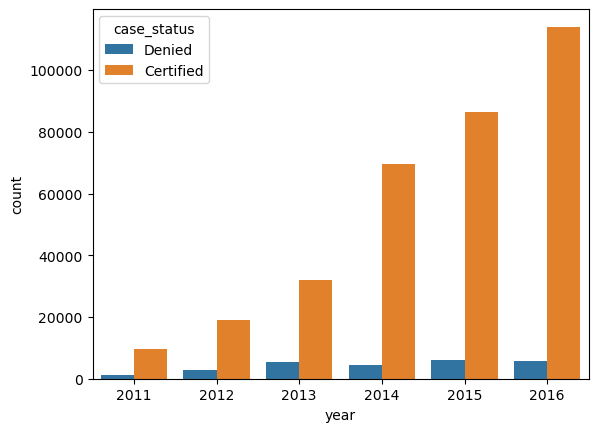

In [43]:
# year wise status

sns.countplot(x = 'year', hue = 'case_status', data = df)

In [44]:
# insights >> upward trend 
# 2016-highest

In [45]:
df.employer_city.unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'austin',
       'Carson City', 'Northfield'], dtype=object)

In [46]:
df.employer_city.value_counts()

employer_city
NEW YORK           15992
COLLEGE STATION    11983
SANTA CLARA        10446
SAN JOSE            9004
REDMOND             8469
                   ...  
PARADISE               1
GRANITE SPRINGS        1
GALLIANO               1
BURKBURNETT            1
Northfield             1
Name: count, Length: 8324, dtype: int64

In [49]:
df['employer_city']= df['employer_city'].str.upper()

In [51]:
df['employer_city'].unique() # everything in capital letter

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'PERRYSVILLE',
       'STILWELL', 'ROYAL OAKS'], dtype=object)

<Axes: xlabel='employer_city', ylabel='count'>

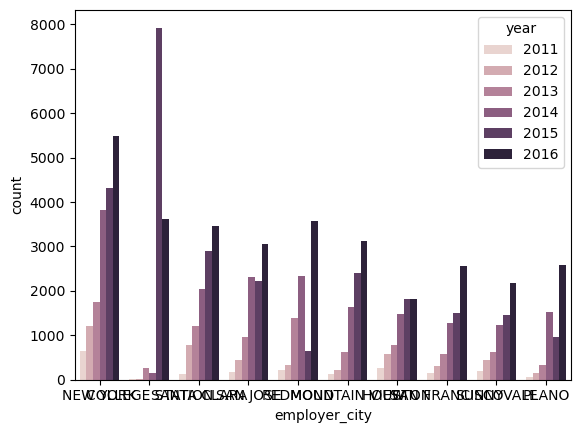

In [54]:
# employer city year wise: year wise which are the city where the visa approved pepole are working


sns.countplot(x = 'employer_city', hue = 'year', data = df, order = df.employer_city.value_counts().iloc[:10].index)

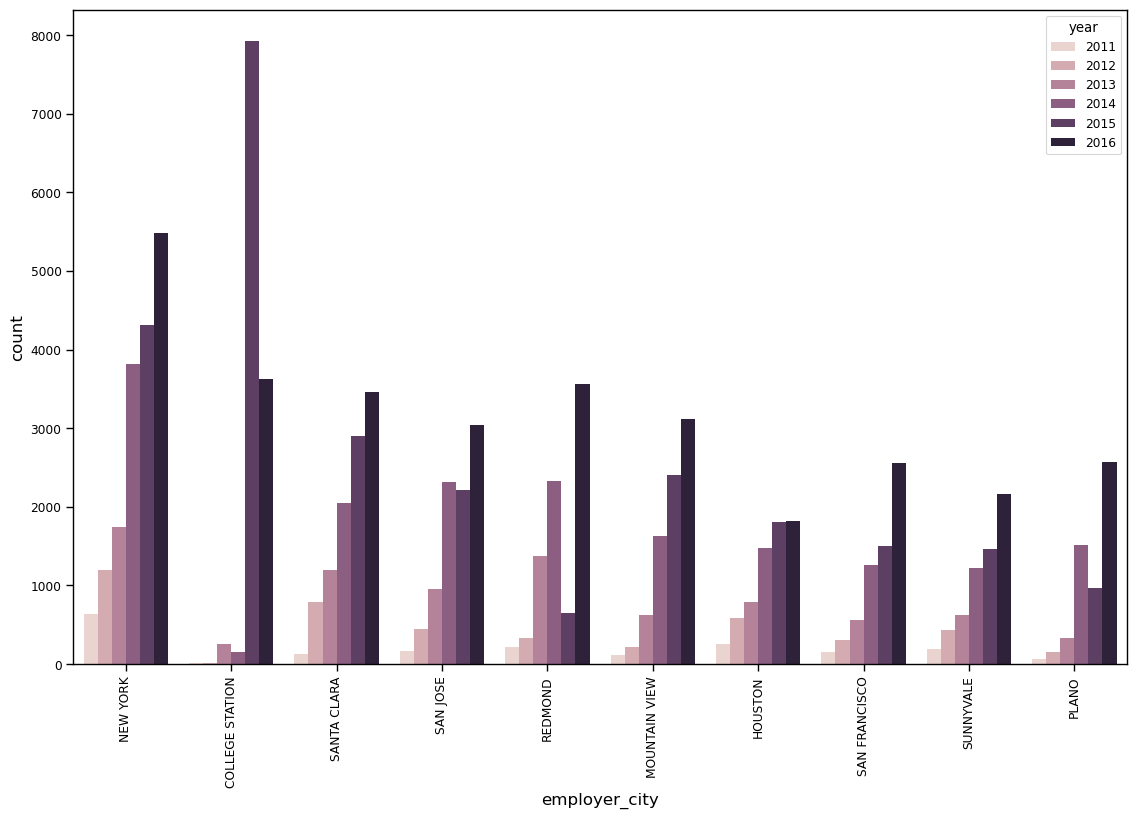

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(13.6, 8.5)

sns.set_context("paper", rc = {"font.size" : 12, "axis.titlesize" : 12, "axes.labelsize" : 12})
sns.countplot(x = 'employer_city', hue = 'year', data = df, order = df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

In [57]:
# top 10 employers by visa application

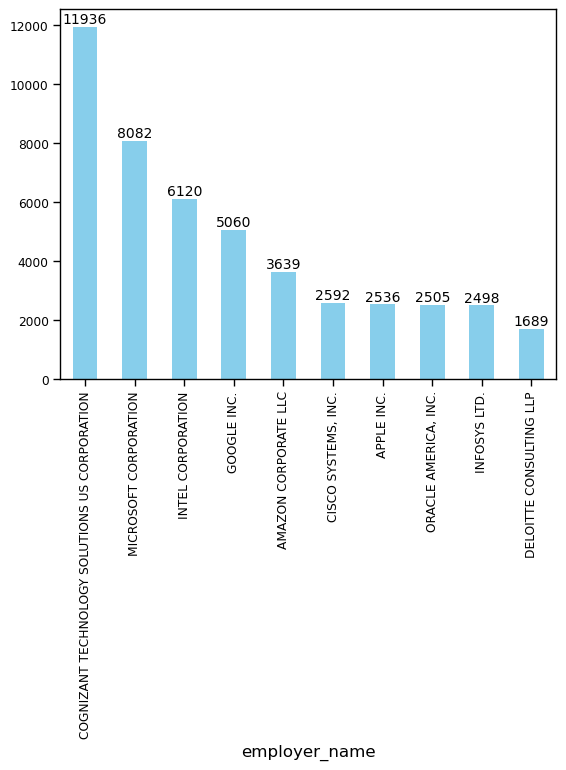

In [71]:
top_emp = df['employer_name'].value_counts().head(10)
top_emp.plot(kind = 'bar', color = 'skyblue')
for i, v in enumerate(top_emp):
    plt.text(i, v+10, str(v), ha = 'center', va = 'bottom', fontsize = 10)

In [72]:
df['us_economic_sector']

0                            IT
1         Other Economic Sector
2                     Aerospace
3         Other Economic Sector
4                  Advanced Mfg
                  ...          
374349                      NaN
374350                      NaN
374351                      NaN
374352                      NaN
374353                      NaN
Name: us_economic_sector, Length: 356168, dtype: object

In [73]:
# value_counts function from scratch
us_economic_counts = {}
for value in df['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
        us_economic_counts[value] = 1


In [74]:
us_economic_counts

{'IT': 49311,
 'Other Economic Sector': 14662,
 'Aerospace': 3917,
 'Advanced Mfg': 17601,
 'Educational Services': 8561,
 'Retail': 4208,
 'Construction': 1315,
 'Hospitality': 1767,
 'Automotive': 1084,
 'Health Care': 6407,
 'Agribusiness': 784,
 'Finance': 8686,
 'Energy': 1021,
 'Transportation': 893,
 'Homeland Security': 78,
 'Biotechnology': 436,
 'Geospatial': 137}

In [75]:
# nos. as list and names of sector as list
usecollabels = []
usecolvalues = []

for key, value in us_economic_counts.items():
    usecollabels.append(key)
    usecolvalues.append(value)

In [76]:
usecollabels

['IT',
 'Other Economic Sector',
 'Aerospace',
 'Advanced Mfg',
 'Educational Services',
 'Retail',
 'Construction',
 'Hospitality',
 'Automotive',
 'Health Care',
 'Agribusiness',
 'Finance',
 'Energy',
 'Transportation',
 'Homeland Security',
 'Biotechnology',
 'Geospatial']

In [77]:
usecolvalues

[49311,
 14662,
 3917,
 17601,
 8561,
 4208,
 1315,
 1767,
 1084,
 6407,
 784,
 8686,
 1021,
 893,
 78,
 436,
 137]

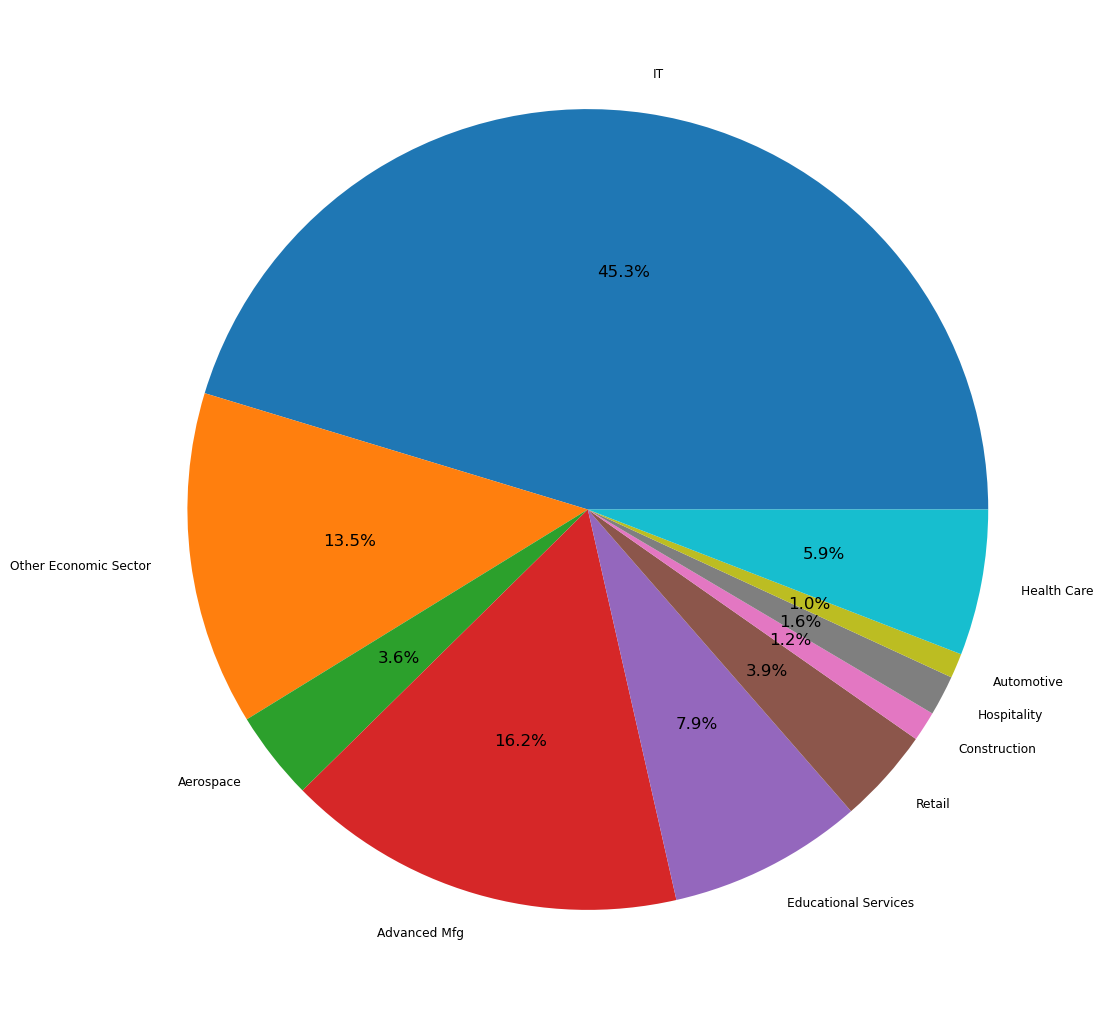

In [80]:
plt.figure(figsize = (13, 13))
plt.pie(usecolvalues[:10], labels = usecollabels[:10], autopct = "%1.1f%%")
plt.show()

In [81]:
# insights >> IT

In [82]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       ...
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089', 'casenumber',
       'year', 'month', 'day'],
      dtype='object', length=156)

In [85]:
df.job_info_job_title.value_counts()[:20]

job_info_job_title
Software Engineer                   14372
Computer Systems Analyst - V         4747
Senior Software Engineer             3801
Computer Systems Analyst - II        3416
Software Developer                   2880
Assistant Professor                  2604
Programmer Analyst                   2534
Computer Systems Analyst - IV        2496
Systems Analyst                      2034
Software Development Engineer II     1630
Poultry Processing Worker            1594
Component Design Engineer            1064
Poultry Processor                    1037
Business Analyst                      963
software engineer                     932
SOFTWARE ENGINEER                     877
Senior Programmer Analyst             862
Sr. Software Engineer                 847
Senior Software Developer             817
Commercial Cleaner                    802
Name: count, dtype: int64

In [86]:
# computer system analyst - V , IV , II and so on, have diff job title
# but job profile/domain is same

# software engineer, SOFTWARE ENGINEER,  Sr. Software Engineer >> all of this should come in same 

In [89]:
#converting to lower case
df.job_info_job_title = df.job_info_job_title.str.lower()

#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df['job_info_job_title'].value_counts(dropna=True)[:10]

job_info_job_title
software engineer                18582
computer systems analyst         12054
senior software engineer          5802
software developer                4501
programmer analyst                3763
assistant professor               2869
software development engineer     2766
systems analyst                   2587
senior programmer analyst         1884
senior software developer         1625
Name: count, dtype: int64

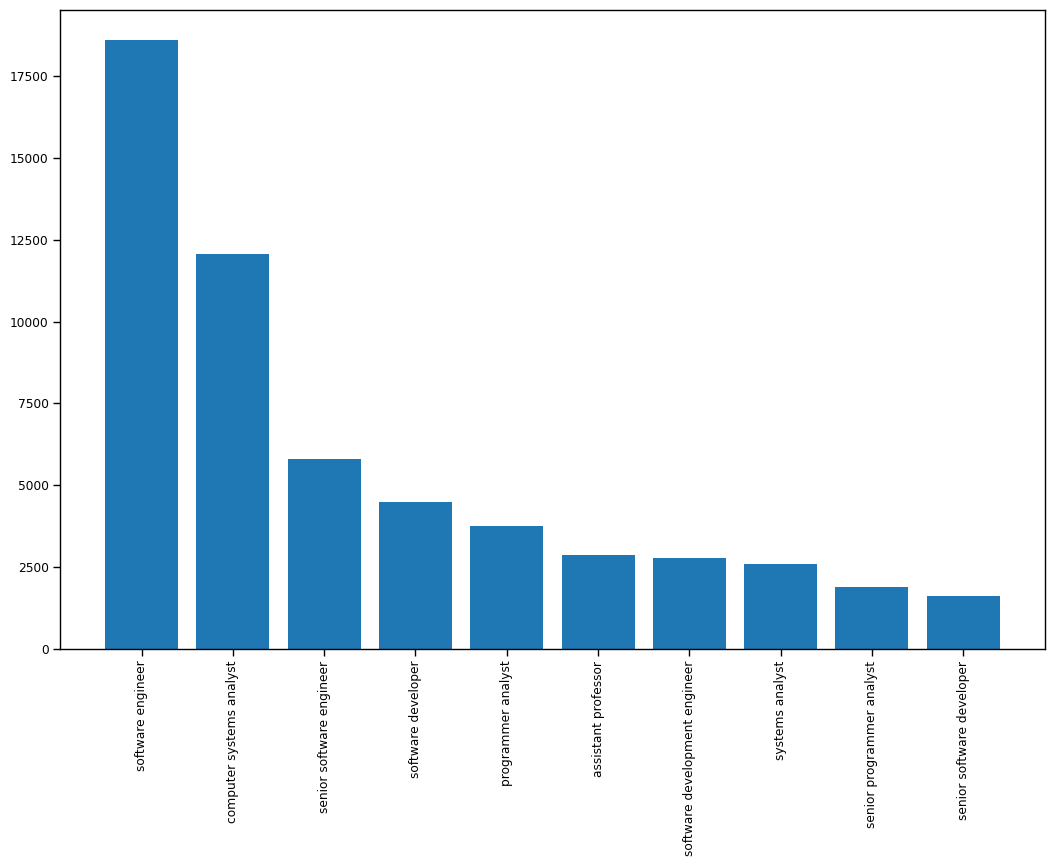

In [92]:
# get the top ten job titles by count

top_job_titles = df.job_info_job_title.value_counts().head(10)

# create a bar plot
plt.figure(figsize = (12.7, 8.3))
plt.bar(top_job_titles.index, top_job_titles)

plt.xticks(rotation = 90)
plt.show()

In [93]:
# insights >> software engineers applies most visa applications

In [95]:
# convert country_of_citizenship column to categorical data type
pd.Categorical(df.country_of_citizenship)

[NaN, NaN, NaN, NaN, NaN, ..., 'INDIA', 'INDIA', 'INDIA', 'INDIA', 'INDIA']
Length: 356168
Categories (201, object): ['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', ..., 'YEMEN', 'YUGOSLAVIA', 'ZAMBIA', 'ZIMBABWE']